In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
df = pd.read_csv('data.csv')

# 데이터 크기 확인
print(f"데이터 크기: {df.shape}")

데이터 크기: (100, 3)


In [24]:
# 데이터 타입 및 정보 확인
print("=== 데이터 타입 및 정보 ===")
print(df.info())

# 결측값 확인
print("\n=== 결측값 ===")
print(df.isnull().sum())

# 문장 길이 확인(단어 수 기준)
df['src_len'] = df['intent'].apply(lambda x: len(str(x).split()))
df['mt_len'] = df['machine_trans'].apply(lambda x: len(str(x).split()))
df['my_len'] = df['my_trans'].apply(lambda x: len(str(x).split()))

# 기본 통계량 확인
print("\n=== 기본 통계 ===")
display(df[['src_len', 'mt_len', 'my_len']].describe())

=== 데이터 타입 및 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   intent         100 non-null    object
 1   machine_trans  100 non-null    object
 2   my_trans       100 non-null    object
 3   src_len        100 non-null    int64 
 4   mt_len         100 non-null    int64 
 5   my_len         100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB
None

=== 결측값 ===
intent           0
machine_trans    0
my_trans         0
src_len          0
mt_len           0
my_len           0
dtype: int64

=== 기본 통계 ===


,src_len,mt_len,my_len
count,100.000000,100.000000,100.000000
mean,8.230000,11.590000,10.740000
std,3.001195,4.463307,4.172106
min,3.000000,4.000000,3.000000
25%,6.000000,8.000000,8.000000
50%,8.000000,11.000000,10.000000
75%,10.000000,14.250000,13.000000
max,16.000000,24.000000,24.000000


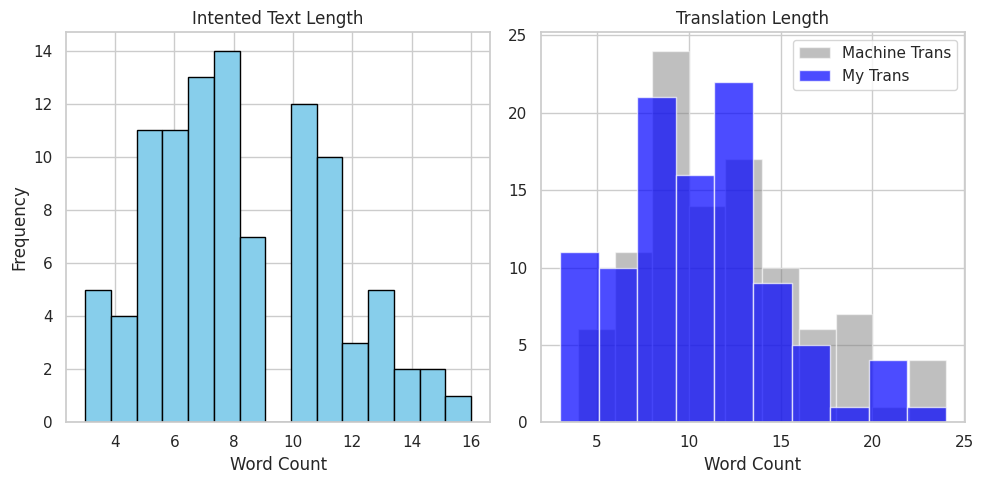

In [20]:
# 문장 길이 분포 확인

plt.figure(figsize=(10, 5))

# 원문 길이 분포
plt.subplot(1, 2, 1)
plt.hist(df['src_len'], bins=15, color='skyblue', edgecolor='black')
plt.title('Intented Text Length')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# 번역문 길이 분포 비교
plt.subplot(1, 2, 2)
plt.hist(df['mt_len'], bins=10, alpha=0.5, label='Machine Trans', color='gray')
plt.hist(df['my_len'], bins=10, alpha=0.7, label='My Trans', color='blue')
plt.title('Translation Length')
plt.xlabel('Word Count')
plt.legend()

plt.tight_layout()
plt.show()

## 분석
- 저는 보통 약 8단어로 의도를 말하는 경향이 있습니다.
- 기계 번역이 제 번역보다 단어를 더 많이 사용하는 경향이 있습니다.

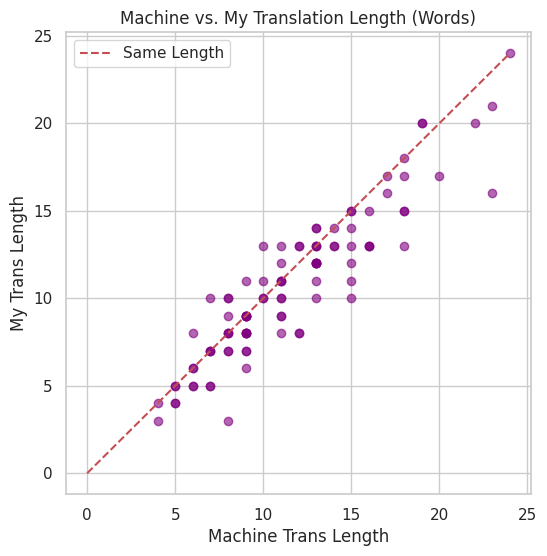

In [ ]:
# 기계 번역과 내 번역 사이 상관관계 확인

plt.figure(figsize=(6, 6))
plt.scatter(df['mt_len'], df['my_len'], alpha=0.6, color='purple')

# 기준선 (y=x) 그리기
max_val = max(df['mt_len'].max(), df['my_len'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Same Length')

plt.title('Machine vs. My Translation Length (Words)')
plt.xlabel('Machine Trans Length')
plt.ylabel('My Trans Length')
plt.legend()
plt.grid(True)
plt.show()

## 분석
- 보통 기계 번역의 길이가 제 번역의 길이보다 긴 것을 재차 확인할 수 있습니다.